In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure

# Data Preparation and Exploration

In [78]:
df = pd.DataFrame({
    'Alcohol': [14.23, 13.20, 13.16, 14.37, 13.24],
    'Malic_Acid': [1.71, 1.78, 2.36, 1.95, 2.59],
    'Ash': [2.43, 2.14, 2.67, 2.50, 2.87],
    'Ash_Alcanity': [15.6, 11.2, 18.6, 16.8, 21.0],
    'Magnesium': [127, 100, 101, 113, 118],
    'Total_Phenols': [2.80, 2.65, 2.80, 3.85, 2.80],
    'Flavanoids': [3.06, 2.76, 3.24, 3.49, 2.69],
    'Nonflavanoid_Phenols': [0.28, 0.26, 0.30, 0.24, 0.39],
    'Proanthocyanins': [2.29, 1.28, 2.81, 2.18, 1.82],
    'Color_Intensity': [5.64, 4.38, 5.68, 7.80, 4.32],
    'Hue': [1.04, 1.05, 1.03, 0.86, 1.04],
    'OD280': [3.92, 3.40, 3.17, 3.45, 2.93],
    'Proline': [1065, 1050, 1185, 1480, 735]
})

In [56]:
assert len(df) == len(target), "Number of samples in the dataset and target do not match."

In [57]:
print(df.columns)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [77]:
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [58]:
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [59]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (178, 13)


In [60]:
print("Number of unique true labels in target:", len(set(target)))

Number of unique true labels in target: 121


In [61]:
if len(df) == len(target):
    print("Number of samples in the dataset and target match.")
else:
    print("Number of samples in the dataset and target do not match.")

Number of samples in the dataset and target match.


In [100]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# K-Means Clustering

In [80]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(data)
    return kmeans, labels

C:\Users\Muhammed Ashik.A\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


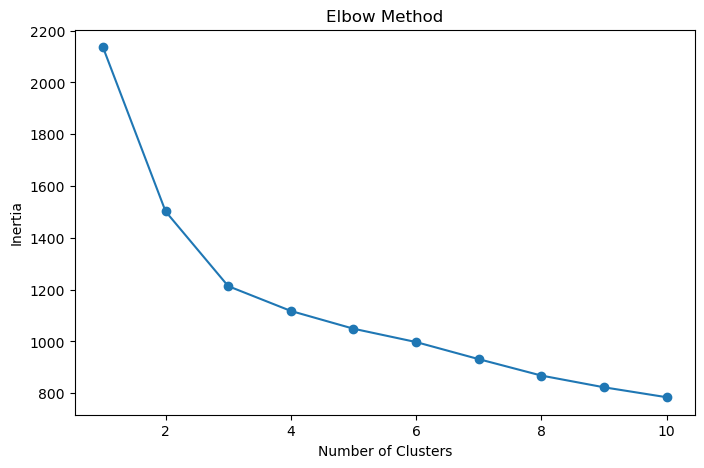

In [81]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [82]:
kmeans_model, kmeans_labels = kmeans_clustering(data_std, n_clusters=3)

# Hierarchical Clustering

In [83]:
def hierarchical_clustering(data, n_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=3)
    labels = hierarchical.fit_predict(data_std)
    return hierarchical, labels

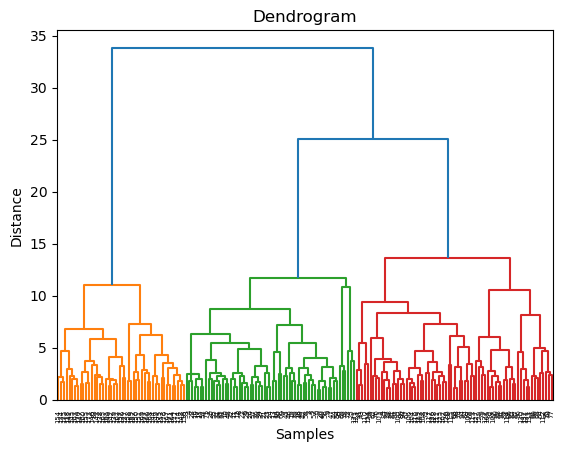

In [84]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data_std, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [85]:
hierarchical_model, hierarchical_labels = hierarchical_clustering(data_std, n_clusters=3)

# DBSCAN Clustering

In [91]:
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    labels = dbscan.fit_predict(data_std)
    return dbscan, labels

In [92]:
dbscan_model, dbscan_labels = dbscan_clustering(data_std, eps=0.5, min_samples=5)

# Comparing and Evaluating Models

In [93]:
print("Number of samples in kmeans_labels:", len(kmeans_labels))
print("Number of samples in hierarchical_labels:", len(hierarchical_labels))
print("Number of samples in dbscan_labels:", len(dbscan_labels))
print("Number of samples in target (true labels):", len(target))

Number of samples in kmeans_labels: 178
Number of samples in hierarchical_labels: 178
Number of samples in dbscan_labels: 178
Number of samples in target (true labels): 178


In [95]:
def evaluate_clustering(labels, true_labels, data):

    kmeans_silhouette = silhouette_score(data_std, kmeans_labels)
    hierarchical_silhouette = silhouette_score(data_std, hierarchical_labels)
    dbscan_silhouette = silhouette_score(data_std, dbscan_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

K-Means Silhouette Score: 0.2581313480696506
Hierarchical Silhouette Score: 0.24140272541312702
DBSCAN Silhouette Score: 0.35651648142700726


In [96]:
print("K-Means Cluster Assignments:", kmeans_labels)
print("Hierarchical Cluster Assignments:", hierarchical_labels)
print("DBSCAN Cluster Assignments:", dbscan_labels)

K-Means Cluster Assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Hierarchical Cluster Assignments: [2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
DBSCAN Cluster Assignments: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [99]:
print("\nSummary:")

if kmeans_silhouette > hierarchical_silhouette and kmeans_silhouette > dbscan_silhouette:
    print("K-Means Clustering performed the best with a silhouette score of", kmeans_silhouette)
    print("The optimal number of clusters for K-Means is 3.")
    
elif hierarchical_silhouette > kmeans_silhouette and hierarchical_silhouette > dbscan_silhouette:
    print("Hierarchical Clustering performed the best with a silhouette score of", hierarchical_silhouette)
    print("The optimal number of clusters for Hierarchical Clustering is 3.")
    
else:
    print("DBSCAN Clustering performed the best with a silhouette score of", dbscan_silhouette)


Summary:
DBSCAN Clustering performed the best with a silhouette score of 0.35651648142700726
